In [52]:
#Data manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

#Data preprocessing libraries
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler

#Model Selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#ML Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#Unsupervised ML library
from sklearn.cluster import KMeans

#Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

# warning filter library
import warnings
warnings.filterwarnings('ignore')

#Multicollinearity Test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Capstone Project.xlsx - Data (2).csv (1).csv')

In [3]:
#Target variable-strength
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
%time df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
Wall time: 7.98 ms


In [5]:
#no null values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Analysis from descriptive statistics
1. There may be skewness in all columns
2. There might be a chance of outliers if we compare quartile of some columns
3. Since minimum and q1 values are same for slag and ash so we do not have outliers in the lower whisker region.
4. The range of feature 'age' is from 1 to 365, so we can say that the unit is in 'Days'.

In [7]:
#checking skewness
df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0.1,153.55,0.00,0.00,154.6,0.00,852.10,664.07,3.0,14.200
0.2,173.80,0.00,0.00,162.0,0.00,913.98,709.94,7.0,20.960
0.3,212.38,0.00,0.00,170.0,0.00,936.00,746.80,14.0,25.474
0.4,238.00,0.00,0.00,178.0,4.06,947.00,758.84,28.0,30.928
0.5,272.90,22.00,0.00,185.0,6.40,968.00,779.50,28.0,34.445
0.6,302.00,97.10,89.76,188.5,8.00,991.52,794.08,28.0,39.020
0.7,332.50,128.50,100.50,192.0,9.60,1012.00,806.90,28.0,43.289
0.8,376.00,163.18,123.00,195.5,11.10,1047.00,845.00,56.0,50.514
0.9,425.00,192.00,141.06,203.5,12.21,1076.45,880.76,100.0,58.820
1.0,540.00,359.40,200.10,247.0,32.20,1145.00,992.60,365.0,82.600


In [8]:
def custom_summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                'feature_name' : col,
                'skewness' : my_df[col].skew(),
                'kurtosis' : my_df[col].kurt()
            })
        result.append(stats)
    result_df = pd.DataFrame(result)
    
    #kurtosis type :
    kurtosis_label = []
    for i in result_df['kurtosis']:
        if i > 1:
            kurtosis_label.append('Leptokurtic Curve')
        elif i < -1:
            kurtosis_label.append('platykurtic Curve')
        else:
            kurtosis_label.append('Mesokurtic Curve')
    result_df['kurtosis comment'] = kurtosis_label
    
    #skewness type:
    skewness_label = []
    for i in result_df['skewness']:
        if -1 < i < -0.5:
            skewness_label.append('Moderately negatively skewed')
        elif i < -1:
            skewness_label.append('Highly negatively skewed')
        elif 0.5 < i < 1:
            skewness_label.append('Moderately positively skewed')
        elif i > 1:
            skewness_label.append('Highly postively skewed')
        else:
            skewness_label.append('almost symmetrical')
        
    result_df['skewness comment'] = skewness_label
    
    # Outliers :
    outliers_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            q1 = my_df[col].quantile(.25)
            q2 = my_df[col].quantile(.5)
            q3 = my_df[col].quantile(.75)
            iqr = q3 - q1
            lower_whisker = q1 - 1.5 * iqr
            upper_whisker = q3 + 1.5*iqr
            if len(my_df[(my_df[col] < lower_whisker) | (my_df[col] > upper_whisker)]) > 0:
                outliers_label.append('Have outliers')
            else:
                outliers_label.append('No outliers')
    result_df['outliers Comment'] = outliers_label
    return result_df
custom_summary(df)

,feature_name,skewness,kurtosis,kurtosis comment,skewness comment,outliers Comment
0,cement,0.509481,-0.520652,Mesokurtic Curve,Moderately positively skewed,No outliers
1,slag,0.800717,-0.508175,Mesokurtic Curve,Moderately positively skewed,Have outliers
2,ash,0.537354,-1.328746,platykurtic Curve,Moderately positively skewed,No outliers
3,water,0.074628,0.122082,Mesokurtic Curve,almost symmetrical,Have outliers
4,superplastic,0.907203,1.411269,Leptokurtic Curve,Moderately positively skewed,Have outliers
5,coarseagg,-0.040220,-0.599016,Mesokurtic Curve,almost symmetrical,No outliers
6,fineagg,-0.253010,-0.102177,Mesokurtic Curve,almost symmetrical,Have outliers
7,age,3.269177,12.168989,Leptokurtic Curve,Highly postively skewed,Have outliers
8,strength,0.416977,-0.313725,Mesokurtic Curve,almost symmetrical,Have outliers


Analysis from Custom Summary
1. Cement has a mesokurtic curve which implies the data points are moderate in distance from the mean.
2. Slag has a mesokurtic curve which implies the data points are moderate in distance from the mean. So mean and standard deviation are moderate.
3. Ash has a platykurtic curve which implies the mean does not represent the whole data properly. So standard deviation is high and outliers will be less
4. Superplastic has a leptokurtic curve which implies the data points are closer to mean, so outliers will be more

# Performing Outlier Treatment

In [9]:
def replace_outlier(my_df, col, method = 'quartile', strategy = 'median'):
    col_data = my_df[col]
    
    if method == 'quartile':
        #using quartile to calculate iqr
        q1 = my_df[col].quantile(.25)
        q2 = my_df[col].quantile(.5)
        q3 = my_df[col].quantile(.75)
        iqr = q3 - q1
        lower_whisker = q1 - 1.5 * iqr
        upper_whisker = q3 + 1.5*iqr
        
    elif method == 'standard deviation':
        mean = col_data.mean()
        std = col_data.std()
        lower_whisker = mean - 2*std
        upper_whisker = mean + 2*std
    else:
        print('Pass a correct method')
        
    #printing all the outliers
    
    outliers = my_df.loc[(col_data < lower_whisker) | (col_data > upper_whisker)]
    outliers_density = round(len(outliers)/len(my_df), 2) * 100
    if len(outliers) == 0:
        print(f'Feature {col} does not have outliers')
    else:
        print(f'Feature {col} has outliers')
        print()
        print(f'Total number of outliers is {col} are {len(outliers)}\n')
        print(f'Outlier percentage in {col} is {outliers_density}%\n')
        display(my_df[(col_data < lower_whisker) | (col_data > upper_whisker)])
        
    #Replacing outliers
    if strategy == 'median':
        my_df.loc[(col_data < lower_whisker) | (col_data > upper_whisker), col] = q2
    elif strategy == 'mean':
        my_df.loc[(col_data < lower_whisker) | (col_data > upper_whisker), col] = mean
    else: 
        print("Pass a correct strategy")
    return my_df
        

# Outlier Detection Technique plots

1. Descriptive Plots
2. Histogram with Outliers
3. Histogram without Outliers

In [10]:
def odt_plots(my_df, col):
    f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (25,8))
    
    
    # Descriptive statistics boxplot
    sns.boxplot(my_df[col], ax = ax1)
    ax1.set_title(col+" (Box Plot)")
    ax1.set_xlabel('values')
    ax1.set_ylabel('Box Plot')
    
    # Plotting Histogram with Outliers
    sns.distplot(my_df[col], ax=ax2, fit = sci.norm) 
    ax2.axvline(my_df[col].mean(), color = 'green')
    ax2.axvline(my_df[col].median(), color = 'brown')
    ax2.set_title(col+" (Histogram with Outliers)")
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Density')
    
    # Replacing Outliers
    df_out = replace_outlier(my_df, col)
    
    # Plotting Histogram without Outliers
    sns.distplot(my_df[col], ax=ax3, fit = sci.norm) 
    ax3.axvline(my_df[col].mean(), color = 'green')
    ax3.axvline(my_df[col].median(), color = 'brown')
    ax3.set_title(col+" (Histogram without Outliers)")
    ax3.set_xlabel('Values')
    ax3.set_ylabel('Density')
    
    plt.show()

Feature cement does not have outliers


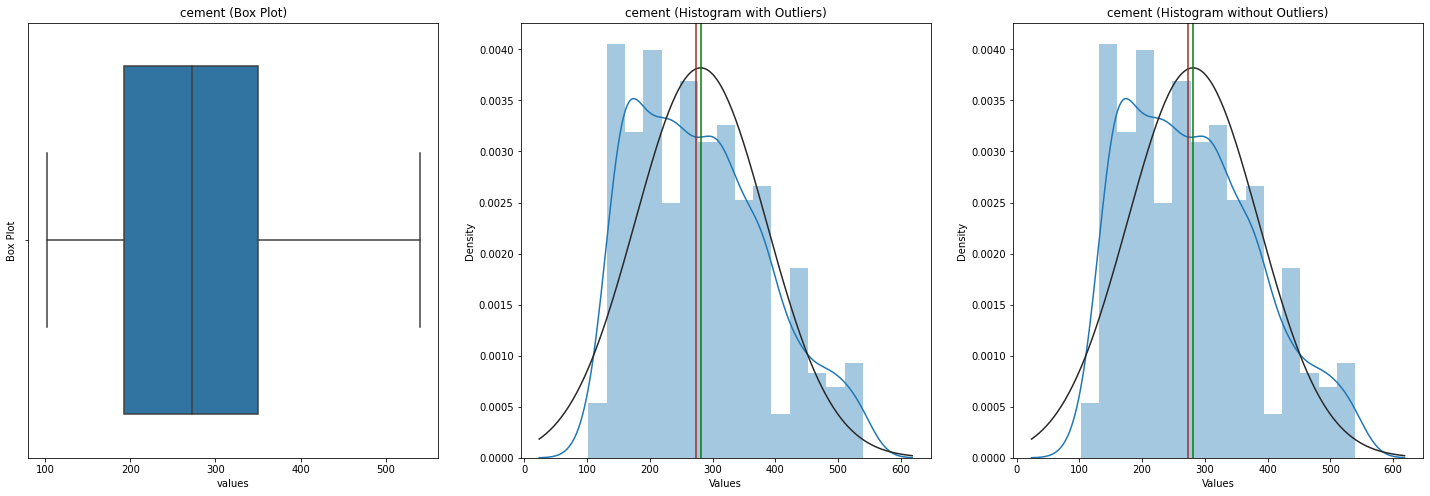

Feature slag has outliers

Total number of outliers is slag are 2

Outlier percentage in slag is 0.0%



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


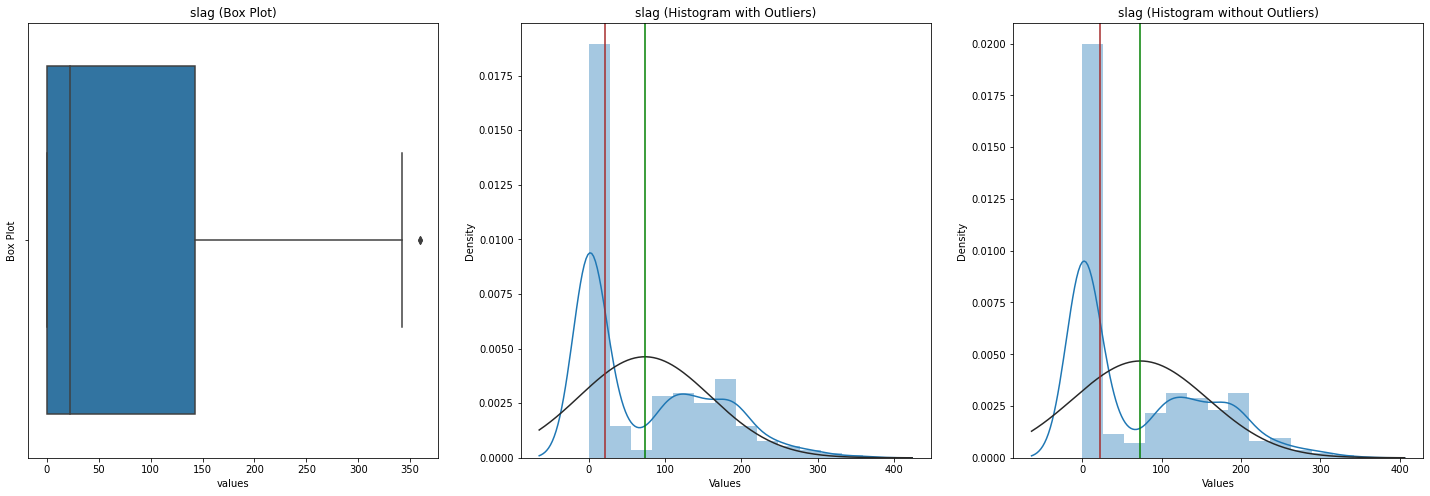

Feature ash does not have outliers


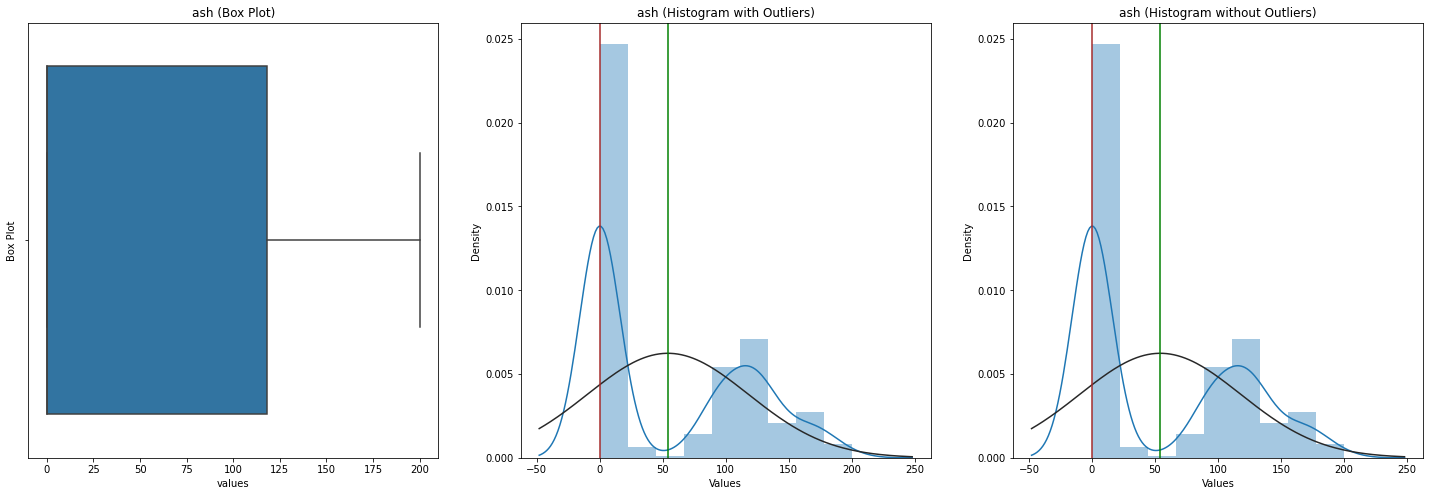

Feature water has outliers

Total number of outliers is water are 9

Outlier percentage in water is 1.0%



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


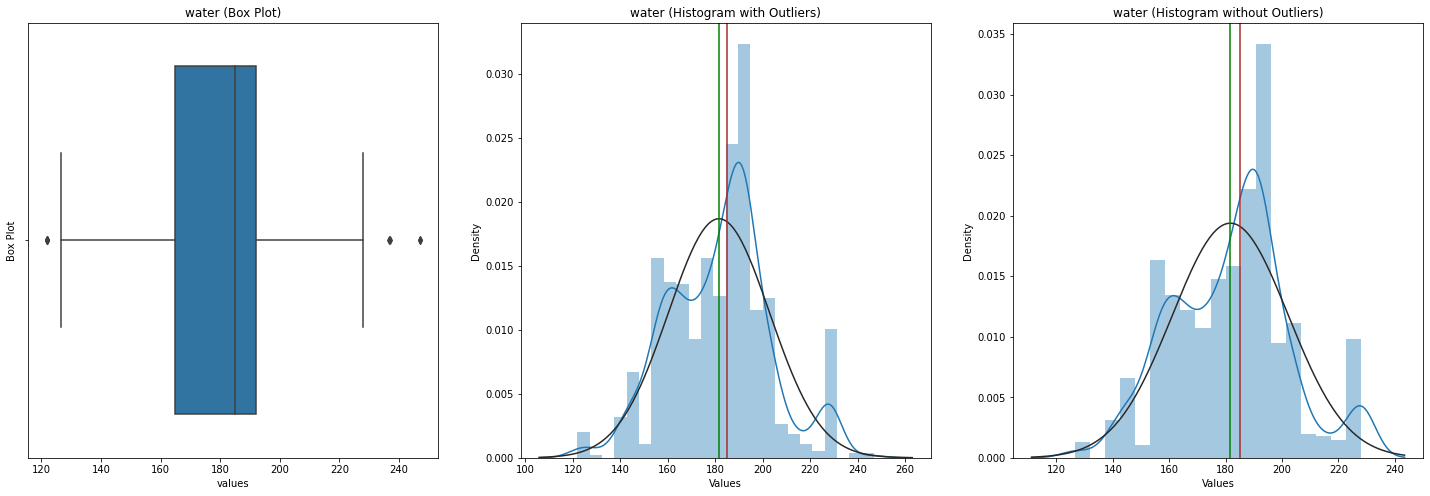

Feature superplastic has outliers

Total number of outliers is superplastic are 10

Outlier percentage in superplastic is 1.0%



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


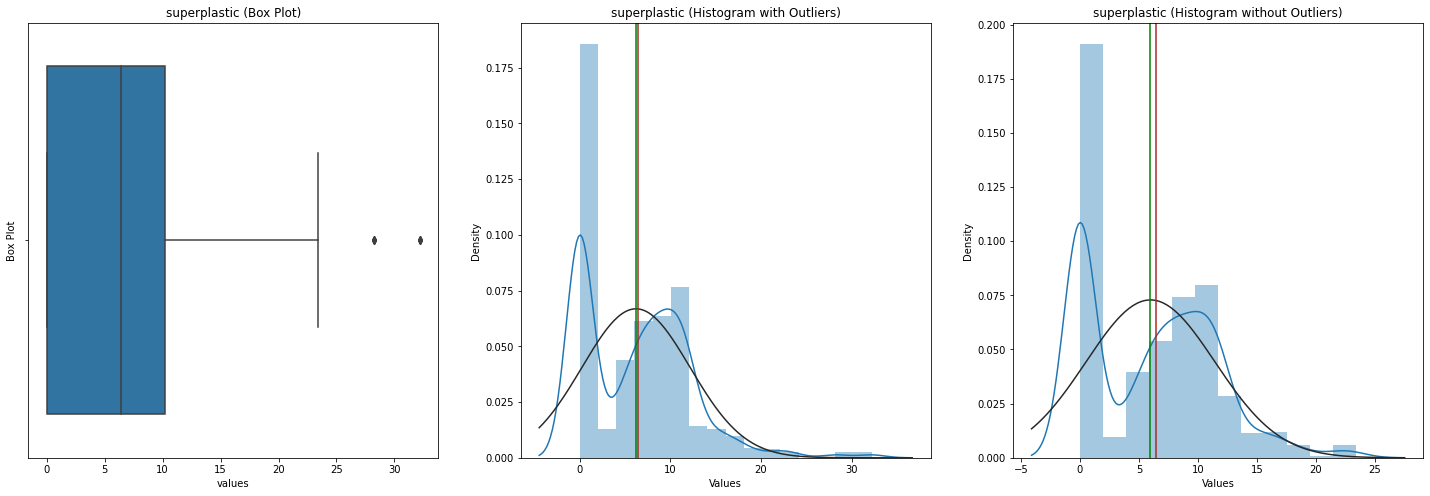

Feature coarseagg does not have outliers


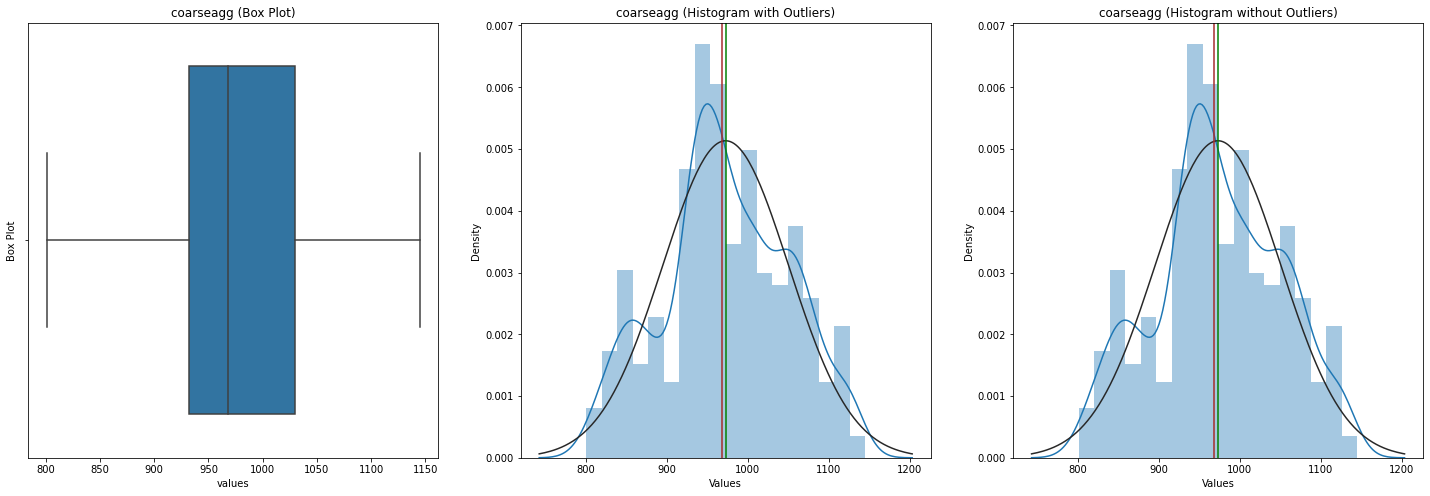

Feature fineagg has outliers

Total number of outliers is fineagg are 5

Outlier percentage in fineagg is 0.0%



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


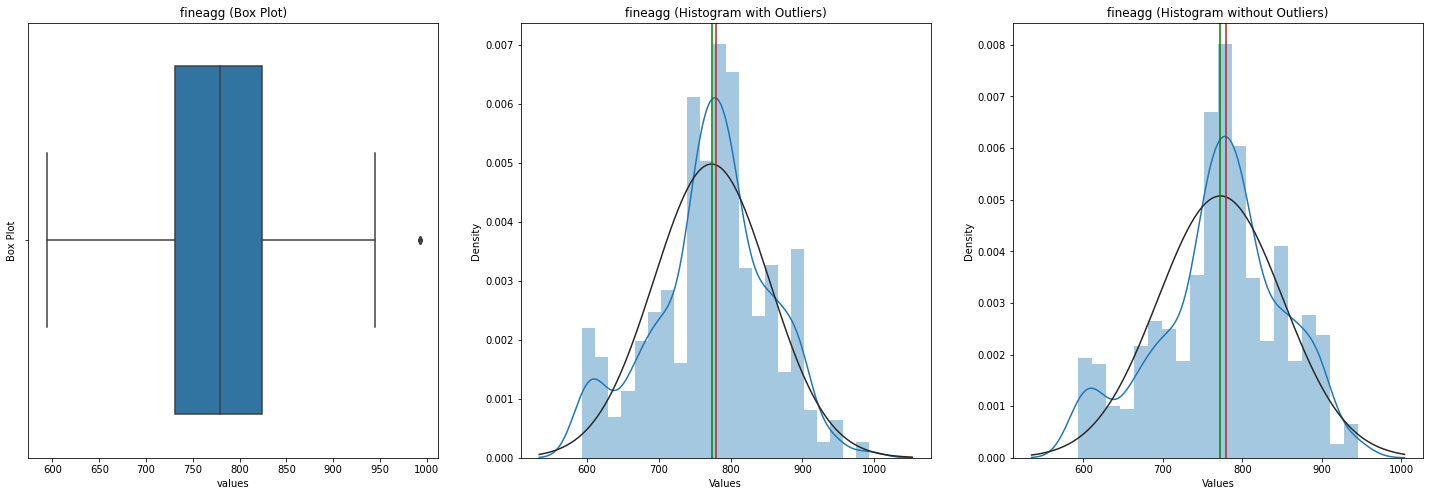

Feature age has outliers

Total number of outliers is age are 59

Outlier percentage in age is 6.0%



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


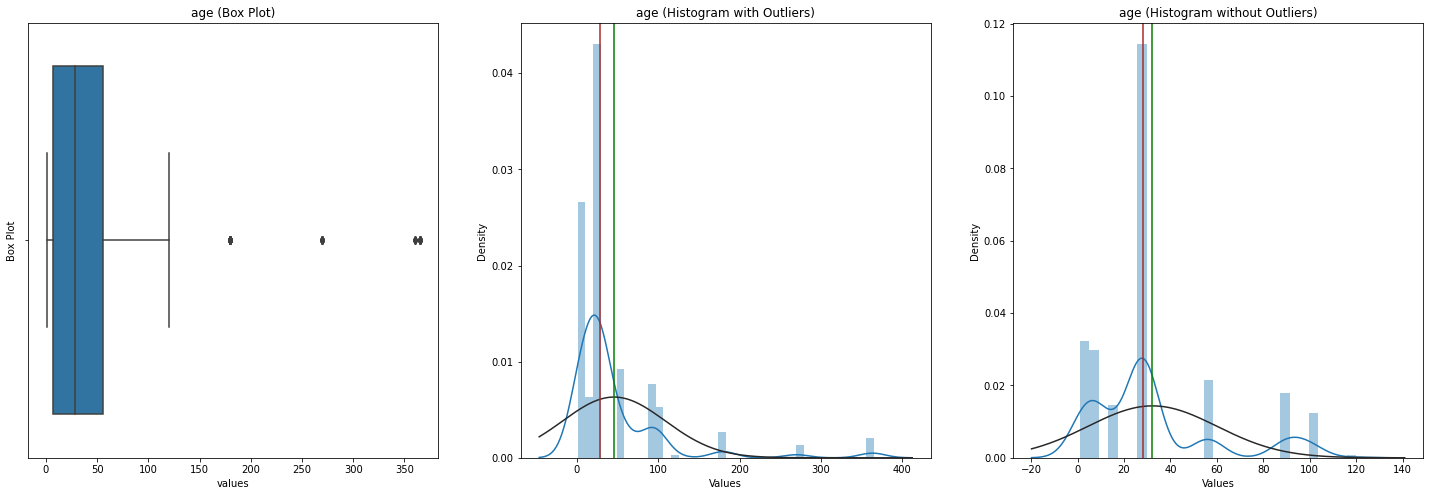

Feature strength has outliers

Total number of outliers is strength are 4

Outlier percentage in strength is 0.0%



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28.0,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91.0,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56.0,80.20


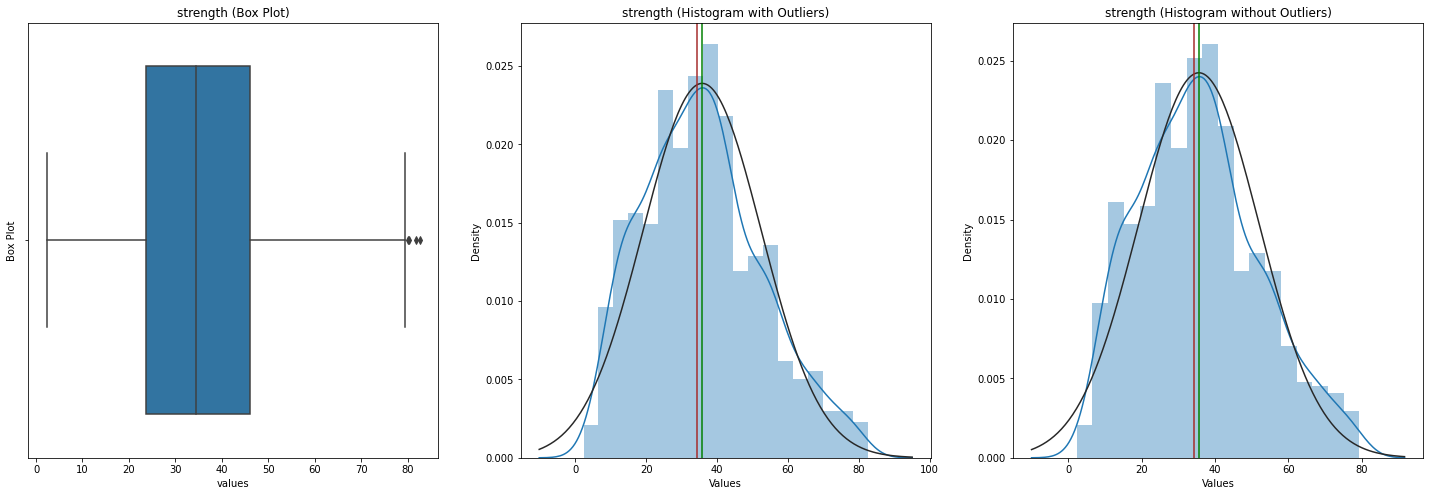

In [11]:
for col in df.columns:
    odt_plots(df, col)

# Multivariate Analysis using Regression

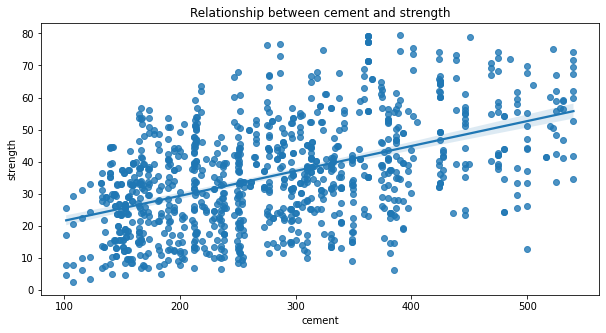

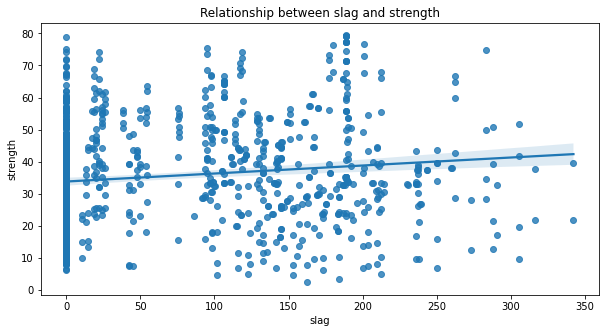

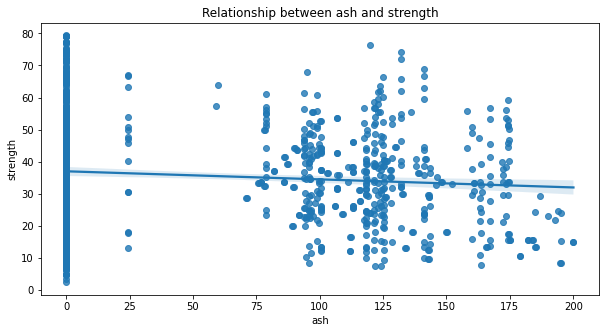

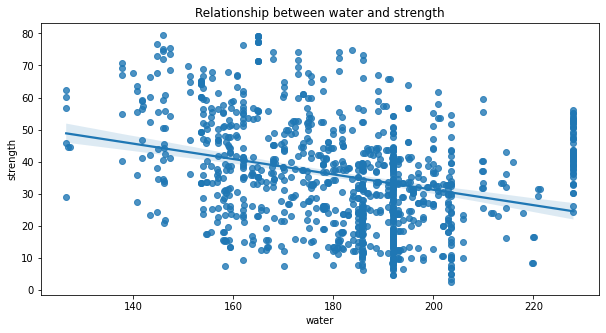

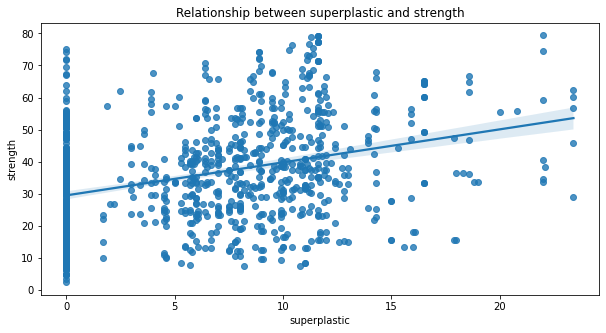

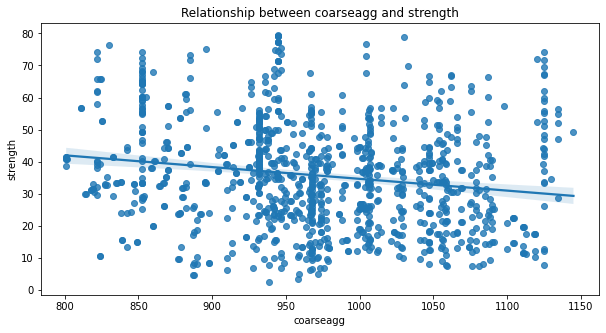

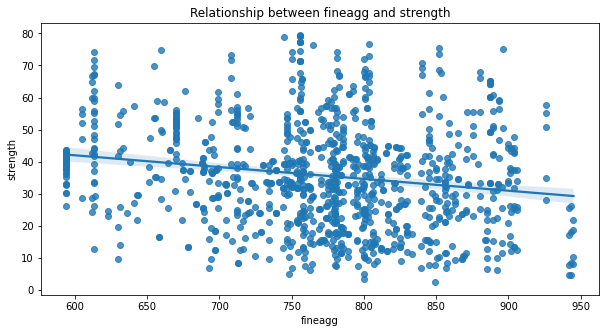

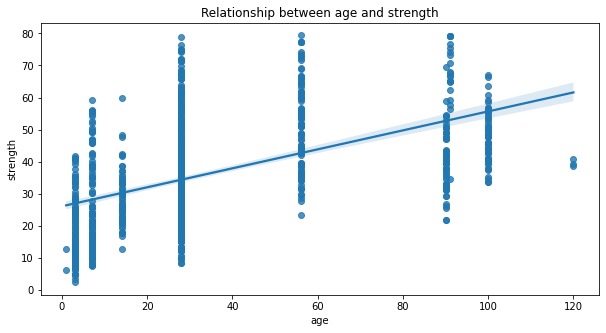

In [12]:
for col in df.columns:
    if col != 'strength':
        fig,ax1 = plt.subplots(figsize = (10, 5))
        sns.regplot(x = df[col], y = df['strength'], ax = ax1).set_title(f'Relationship between {col} and strength')

Analysis from Regression Plot
1. Strength and cement are highly positively correlated
2. Slag and strength are slightly positively correlated
.
.
.


# Multicollinearity Test

1. Correlation matrix/heatmap 

In [13]:
#correlation with target feature
df.corr()[['strength']]

,strength
cement,0.493518
slag,0.129561
ash,-0.097973
water,-0.300043
superplastic,0.342633
coarseagg,-0.173234
fineagg,-0.176113
age,0.499711
strength,1.000000


Age and cement have a good correlation with the target feature

<AxesSubplot:>

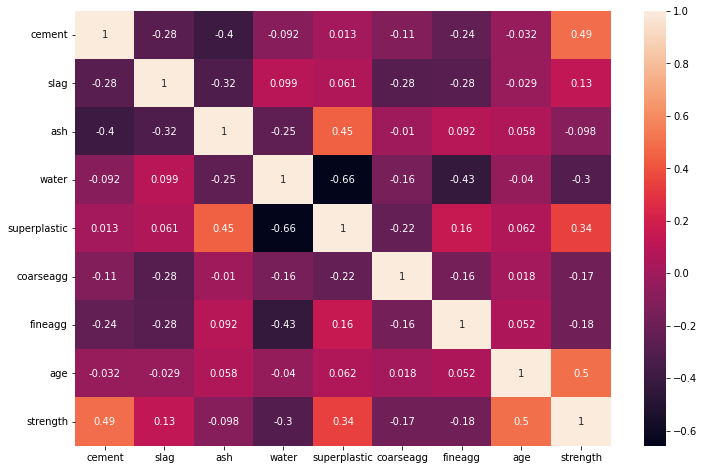

In [14]:
corr = df.corr()
df.ax = plt.subplots(figsize = (12,8))
sns.heatmap(corr, annot = True)

Analysis
1. Slag has high correlation with ash
2. Ash has high correlation with cement

# Applying PCA to treat Multi-Collinearity

In [15]:
def custom_PCA(X):
    n_comp = len(X.columns)
    
# Applying StandardScaler for feature scaling
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    for i in range(1, n_comp):
        pca = PCA(n_components=i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            pcs = i
            break
    print("Explained Variance Ratio after PCA is : ", evr)
    # Creating a Dataframe of Principal Components
    col = []
    for j in range(1, pcs+1):
        col.append("PC_"+str(j))
    pca_df = pd.DataFrame(p_comp, columns = col)
    return pca_df

In [16]:
pca_df = custom_PCA(df.drop("strength", axis=1))

Explained Variance Ratio after PCA is :  [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [17]:
# 94% of the information we are retaining without standard scaler
# 97.26% of the information we are retaining after feature scaling(standard scaler)

In [18]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


# Joining PCA features with target features

In [19]:
pca_df = pca_df.join(df['strength'], how = 'left')

In [20]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC_1      1030 non-null   float64
 1   PC_2      1030 non-null   float64
 2   PC_3      1030 non-null   float64
 3   PC_4      1030 non-null   float64
 4   PC_5      1030 non-null   float64
 5   PC_6      1030 non-null   float64
 6   strength  1030 non-null   float64
dtypes: float64(7)
memory usage: 56.5 KB


# Model Building

In [21]:
X = pca_df.drop('strength', axis=1)
y = pca_df['strength']

In [22]:
X.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228


In [23]:
y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [131]:
def model_builder(model_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = [model_name, rmse, r2]
    return result

In [132]:
model_builder(model_name = 'LinearRegression', model = LinearRegression())

['LinearRegression', 9.510886873673916, 0.6519519960039926]

In [133]:
def multiple_models():
    col_names = ["Model Name", "RMSE", "R2 Score"]
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression',LinearRegression())
    result.loc[len(result)] = model_builder('Lasso Regression',Lasso())
    result.loc[len(result)] = model_builder('Ridge Regression',Ridge())
    result.loc[len(result)] = model_builder('Decision Tree Regressor',DecisionTreeRegressor())
    result.loc[len(result)] = model_builder('Support Vector Regressor',SVR())
    result.loc[len(result)] = model_builder('K Nearest Neighbors',KNeighborsRegressor())
    result.loc[len(result)] = model_builder('Random Forest Regressor',RandomForestRegressor())
    result.loc[len(result)] = model_builder('Ada Boost Regressor',AdaBoostRegressor())
    result.loc[len(result)] = model_builder('Gradient Boosting Regressor',GradientBoostingRegressor())
    result.loc[len(result)] = model_builder('xg Boosting Regressor',XGBRegressor())
    return result.sort_values("R2 Score", ascending=False)

In [134]:
multiple_models()

,Model Name,RMSE,R2 Score
9,xg Boosting Regressor,6.613111,0.831729
6,Random Forest Regressor,6.726455,0.825912
8,Gradient Boosting Regressor,7.106450,0.805687
5,K Nearest Neighbors,8.031486,0.751807
7,Ada Boost Regressor,8.446301,0.725508
4,Support Vector Regressor,9.107654,0.680839
3,Decision Tree Regressor,9.109034,0.680742
1,Lasso Regression,9.426183,0.658124
2,Ridge Regression,9.508918,0.652096
0,Linear Regression,9.510887,0.651952


# Cross Validation

In [29]:
def k_fold_cv(X, y, fold = 10):
    score_lr = cross_val_score(LinearRegression(), X, y, cv = fold)
    score_lasso = cross_val_score(Lasso(), X, y, cv = fold)
    score_ridge = cross_val_score(Ridge(), X, y, cv = fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(), X, y, cv = fold)
    score_svr = cross_val_score(SVR(), X, y, cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(), X, y, cv = fold)
    score_rfg = cross_val_score(RandomForestRegressor(), X, y, cv = fold)
    score_abg = cross_val_score(AdaBoostRegressor(), X, y, cv = fold)
    score_gbr = cross_val_score(GradientBoostingRegressor(), X, y, cv = fold)
    score_xgb = cross_val_score(XGBRegressor(), X, y, cv = fold)
    
    model_name = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
                  'Decision Tree Regressor', 'Support Vector Regressor', 'K Nearest Neighbors', 'Random Forest Regressor',
                  'Ada Boost Regressor', 'Gradient Boosting Regressor', 'XG Boosting']
    scores = [score_lr, score_lasso, score_ridge, score_dtr, 
             score_svr, score_knn, score_rfg, score_abg,
             score_gbr, score_xgb]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        tmp = [m_name, score_mean, score_std]
        result.append(tmp)
    k_fold_df = pd.DataFrame(result, columns = ['model_name', 'CV Accuracy', 'CV Standard Deviation'])
    return k_fold_df.sort_values('CV Accuracy', ascending=False)

In [30]:
%time k_fold_cv(X, y)

Wall time: 16.9 s


,model_name,CV Accuracy,CV Standard Deviation
9,XG Boosting,0.873262,0.036061
6,Random Forest Regressor,0.866352,0.032451
8,Gradient Boosting Regressor,0.828985,0.050207
5,K Nearest Neighbors,0.768162,0.055974
3,Decision Tree Regressor,0.760526,0.060050
7,Ada Boost Regressor,0.724890,0.039946
4,Support Vector Regressor,0.703117,0.042765
2,Ridge Regression,0.663935,0.059437
0,Linear Regression,0.663928,0.059476
1,Lasso Regression,0.649837,0.049887


# Hyperparameter tuning

In [39]:
def tuning(X, y, fold=10):
    param_LAS = {'alpha':[1e-15, 1e-13, 1e-11, 1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 0, 3, 4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_KNN = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70]}
    param_DTR = {'max_depth':[3,5,7,9,10,12,14,16], 'max_features':['auto', 'sqrt', 'log2', 'sqrt',2,3,4,5,6]}
    param_SVR = {'gamma':['scale', 'auto'], 'C':[0.5,1]}
    param_ADB = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_GB = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_XGB = {'eta':[0.1,0.2,0.3,0.4,0.5], 'max_depth':[3,5,7,9,10,12,14,16], 'gamma':[0,10,20,30,40,50,60,70,80,90,100,200,300,400,500], 'reg_lambda':[0,1]}
    param_RF = {'max_depth':[3,5,7,9,10,12,14,16], 'max_features':['auto', 'sqrt', 'log2', 'sqrt',2,3,4,5,6]}
    
# Hyperparameter tuning
    tune_LAS = GridSearchCV(Lasso(), param_LAS, cv = fold)
    tune_RID = GridSearchCV(Ridge(), param_LAS, cv = fold)
    tune_KNN = GridSearchCV(KNeighborsRegressor(), param_KNN, cv = fold)
    tune_DTR = GridSearchCV(DecisionTreeRegressor(), param_DTR, cv = fold)
    tune_SVR = GridSearchCV(SVR(), param_SVR, cv = fold)
    tune_ADB = GridSearchCV(AdaBoostRegressor(), param_ADB, cv = fold)
    tune_GB = GridSearchCV(GradientBoostingRegressor(), param_GB, cv = fold)
    tune_XGB = GridSearchCV(XGBRegressor(), param_XGB, cv = fold)
    tune_RF = GridSearchCV(RandomForestRegressor(), param_RF, cv = fold)

# Fitting X and y variables
    
    tune_LAS.fit(X,y)
    tune_RID.fit(X,y)
    tune_KNN.fit(X,y)
    tune_DTR.fit(X,y)
    tune_SVR.fit(X,y)
    tune_ADB.fit(X,y)
    tune_GB.fit(X,y)
    tune_XGB.fit(X,y)
    tune_RF.fit(X,y)
    
    tune = [tune_LAS, tune_RID, tune_KNN, tune_DTR, tune_SVR, tune_ADB, tune_GB, tune_XGB, tune_RF]
    model = ['Lasso', 'Ridge', 'K Nearest Neighbors', 'DTR', 'Support Vector Regressor', 
             'Ada Boost Regressor', 'Gradient Boosting Regressor', 'XG Boosting',  'Random Forest Regressor']
    
    for i in range(len(tune)):
        print('Models :', model[i])
        print('Best Parameters :',tune[i].best_params_)


In [40]:
%time tuning(X,y)

Models : Lasso
Best Parameters : {'alpha': 0.1}
Models : Ridge
Best Parameters : {'alpha': 6}
Models : K Nearest Neighbors
Best Parameters : {'n_neighbors': 4}
Models : DTR
Best Parameters : {'max_depth': 16, 'max_features': 5}
Models : Support Vector Regressor
Best Parameters : {'C': 1, 'gamma': 'scale'}
Models : Ada Boost Regressor
Best Parameters : {'learning_rate': 0.9}
Models : Gradient Boosting Regressor
Best Parameters : {'alpha': 0.6}
Models : XG Boosting
Best Parameters : {'eta': 0.2, 'gamma': 0, 'max_depth': 5, 'reg_lambda': 0}
Models : Random Forest Regressor
Best Parameters : {'max_depth': 14, 'max_features': 3}
Wall time: 5h 12min 54s


In [45]:
# # Output
# Models : Lasso
# Best Parameters : {'alpha': 0.1}
# Models : Ridge
# Best Parameters : {'alpha': 6}
# Models : K Nearest Neighbors
# Best Parameters : {'n_neighbors': 4}
# Models : DTR
# Best Parameters : {'max_depth': 16, 'max_features': 5}
# Models : Support Vector Regressor
# Best Parameters : {'C': 1, 'gamma': 'scale'}
# Models : Ada Boost Regressor
# Best Parameters : {'learning_rate': 0.9}
# Models : Gradient Boosting Regressor
# Best Parameters : {'alpha': 0.6}
# Models : XG Boosting
# Best Parameters : {'eta': 0.2, 'gamma': 0, 'max_depth': 5, 'reg_lambda': 0}
# Models : Random Forest Regressor
# Best Parameters : {'max_depth': 14, 'max_features': 3}
# Wall time: 5h 12min 54s

# Cross validation post Hyperparameter tuning

In [46]:
def cv_post_hpt(X, y, fold=10):
    score_lr = cross_val_score(LinearRegression(), X, y, cv = fold)
    score_lasso = cross_val_score(Lasso(alpha=0.1), X, y, cv = fold)
    score_ridge = cross_val_score(Ridge(alpha=6), X, y, cv = fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(max_depth=16, max_features=5), X, y, cv = fold)
    score_svr = cross_val_score(SVR(C=1, gamma='scale'), X, y, cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(n_neighbors=4), X, y, cv = fold)
    score_rfg = cross_val_score(RandomForestRegressor(max_depth=14, max_features=3), X, y, cv = fold)
    score_abg = cross_val_score(AdaBoostRegressor(learning_rate=0.9), X, y, cv = fold)
    score_gbr = cross_val_score(GradientBoostingRegressor(alpha=0.6), X, y, cv = fold)
    score_xgb = cross_val_score(XGBRegressor(eta=0.2, gamma=0, max_depth=5, reg_lambda=0), X, y, cv = fold)
    
    model_name = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
                  'Decision Tree Regressor', 'Support Vector Regressor', 'K Nearest Neighbors', 'Random Forest Regressor',
                  'Ada Boost Regressor', 'Gradient Boosting Regressor', 'XG Boosting']
    scores = [score_lr, score_lasso, score_ridge, score_dtr, 
             score_svr, score_knn, score_rfg, score_abg,
             score_gbr, score_xgb]
    result = []
    
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        tmp = [m_name, score_mean, score_std]
        result.append(tmp)
    k_fold_df = pd.DataFrame(result, columns = ['model_name', 'CV Accuracy', 'CV Standard Deviation'])
    return k_fold_df.sort_values('CV Accuracy', ascending=False)    

In [47]:
%time cv_post_hpt(X, y)

Wall time: 7.37 s


,model_name,CV Accuracy,CV Standard Deviation
9,XG Boosting,0.879316,0.036140
6,Random Forest Regressor,0.868821,0.031896
8,Gradient Boosting Regressor,0.828469,0.050424
5,K Nearest Neighbors,0.770715,0.054459
3,Decision Tree Regressor,0.763085,0.061481
7,Ada Boost Regressor,0.728743,0.039246
4,Support Vector Regressor,0.703117,0.042765
1,Lasso Regression,0.664143,0.058426
2,Ridge Regression,0.663951,0.059242
0,Linear Regression,0.663928,0.059476


In [48]:
model_builder('xg Boosting Regressor',XGBRegressor())

['xg Boosting Regressor', 6.613110982116544, 0.8317292084240074]

In [49]:
model1 = XGBRegressor(eta=0.2, gamma=0, max_depth=5, reg_lambda=0).fit(X_train, y_train)
y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [50]:
r2, rmse

(0.8314771397004583, 6.61806233054081)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('strength', axis=1), df['strength'], test_size=0.3, random_state=100)
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

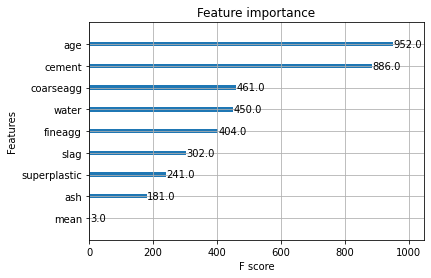

In [148]:
xgboost.plot_importance(xgb)

Age and Cement are the two most important for predicting strength of the mixture

# Building Learning Curve Analysis

In [149]:
from sklearn.model_selection import learning_curve

In [154]:
def generate_learning_curve(model_name, estimator, X, y):
    train_size, train_score, test_score = learning_curve(estimator = estimator, X= X, y=y, cv=10)
    train_score_mean = np.mean(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    plt.plot(train_size, train_score_mean, c = 'blue')
    plt.plot(train_size, test_score_mean, c = 'red')
    plt.xlabel('Samples')
    plt.ylabel('R2 Score')
    plt.title('Learning Curve for' + model_name)
    plt.legend(('Training R2 Score', 'Testing R2 Score'))

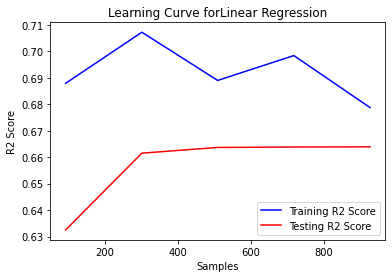

In [155]:
generate_learning_curve('Linear Regression', LinearRegression(), X, y)

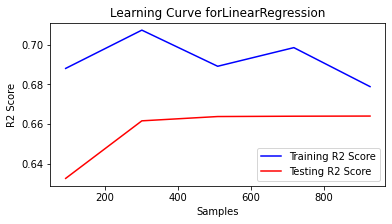

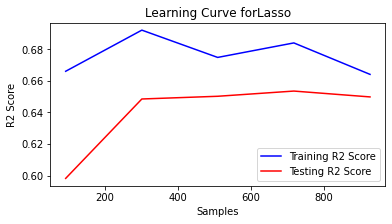

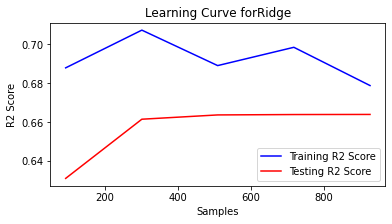

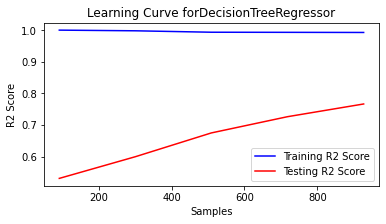

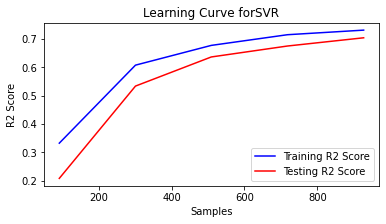

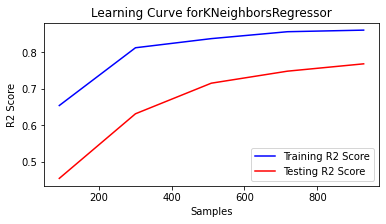

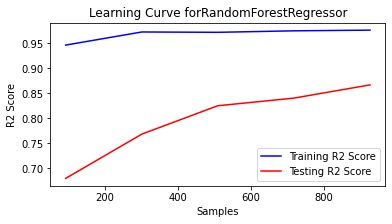

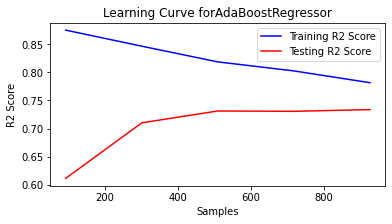

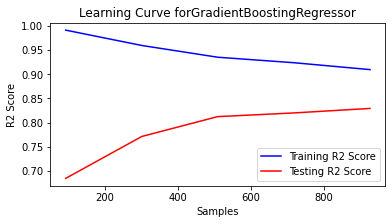

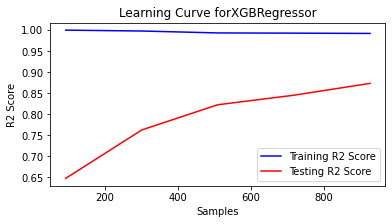

In [156]:
models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), SVR(), 
          KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor()]
for a , model in enumerate(models):
    fg = plt.figure(figsize = (6,3))
    ax = fig.add_subplot(10, 1, a+1)
    generate_learning_curve(type(models[a]).__name__, model, X, y)